## Assignment-07 First Step of using machine learning and models.

![](https://github.com/Computing-Intelligence/jupyters_and_slides/raw/master/entrance-test/images/kkb-ai.png)

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

In [1]:
import pandas as pd
import jieba
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [2]:
# it‘s your time
fname = '/Users/xuziqing/Desktop/Activity/2019NLP/datasource/sqlResult_1558435.csv'
content = pd.read_csv(fname, encoding='gb18030')

### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [3]:
# it's your time
content['y'] = content.apply(lambda x: 1 if x['source'] == '新华社' else 0, axis=1)

### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对文本进行向量化

In [4]:
text_list = content['content'].to_list()

In [5]:
def clean_text(text):
    text = text.replace('\r', '')
    text = text.replace('\n', '')
    text = text.replace(' ', '')
    text = text.replace('\u3000', '')
    text.replace('/', '')
    return text

In [6]:
corpus = []
for text in text_list:
    if type(text) == float:
        corpus.append('空')
    else:
        text = clean_text(text)
        text = jieba.cut(text)
        line = ' '.join(text)
        corpus.append(line)
    

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/rj/jzx__st55sb6pdxspk3qncf80000gn/T/jieba.cache
Loading model cost 0.976 seconds.
Prefix dict has been built succesfully.


In [7]:
vectorize = TfidfVectorizer(max_features=200)
X = vectorize.fit_transform(corpus)

In [8]:
print(X.shape)

(89611, 200)


### KNN

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
y = content['y'].to_list()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=5)

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

In [13]:
# 选取不同的k，训练模型，并记录每个模型在train，valid和test上的表现:accuracy, recall, precision, f1
K = [1, 2, 3, 5, 10]
train_acc = []
train_precision = []
train_recall = []
train_f1 = []
valid_acc = []
valid_precision = []
valid_recall = []
valid_f1 = []
test_acc = []
test_precision = []
test_recall = []
test_f1 = []

for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(X_train, y_train)
    train_pred = neigh.predict(X_train)
    valid_pred = neigh.predict(X_valid)
    test_pred = neigh.predict(X_test)
    # acc
    t1 = neigh.score(X_train, y_train)
    t2 = neigh.score(X_valid, y_valid)
    t3 = neigh.score(X_test, y_test)
    train_acc.append(t1)
    valid_acc.append(t2)
    test_acc.append(t3)
    # precision and recall
    p, r, t = precision_recall_curve(y_train, neigh.predict(X_train))
    train_precision.append(p[1])
    train_recall.append(r[1])
    train_f1.append(p[1] * r[1] / (p[1] + r[1]))
    
    p, r, t = precision_recall_curve(y_valid, neigh.predict(X_valid))
    valid_precision.append(p[1])
    valid_recall.append(r[1])
    valid_f1.append(p[1] * r[1] / (p[1] + r[1]))
    
    p, r, t = precision_recall_curve(y_test, neigh.predict(X_test))
    test_precision.append(p[1])
    test_recall.append(r[1])
    test_f1.append(p[1] * r[1] / (p[1] + r[1]))
    
    print(k, ' Neighbour-Model accuracy on training, validation and test dataset is: ', round(t1, 2), round(t2, 2), round(t3, 2))
    

1  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93 0.93
2  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93 0.93
3  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.94 0.93
5  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93 0.93
10  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93 0.93


### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

### accuracy曲线

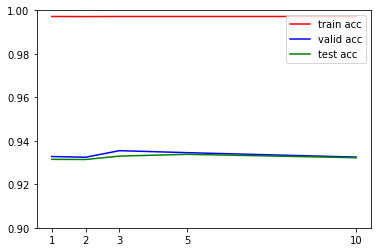

In [16]:
plt.plot(K, train_acc, color='r', label='train acc')
plt.plot(K, valid_acc, color='b', label='valid acc')
plt.plot(K, test_acc, color='g', label='test acc')
plt.ylim(0.9, 1.0)
plt.xticks([1, 2, 3, 5, 10])
plt.legend(loc='upper right')
plt.show()

### precision曲线：precision是查准率，即准确预测为1的样本数量占预测为1的样本数量比例

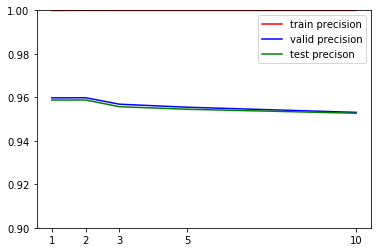

In [17]:
plt.plot(K, train_precision, color='r', label='train precision')
plt.plot(K, valid_precision, color='b', label='valid precision')
plt.plot(K, test_precision, color='g', label='test precison')
plt.legend(loc='upper right')
plt.ylim(0.9, 1.0)
plt.xticks([1, 2, 3, 5, 10])
plt.show()

### recall曲线：recall是查全率，即预测为1且准确的样本占总的分类为1的比例

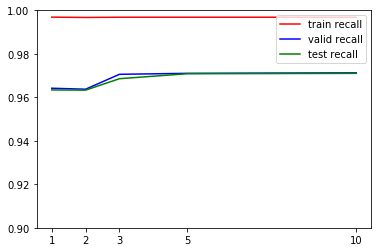

In [18]:
plt.plot(K, train_recall, color='r', label='train recall')
plt.plot(K, valid_recall, color='b', label='valid recall')
plt.plot(K, test_recall, color='g', label='test recall')
plt.legend(loc='upper right')
plt.ylim(0.9, 1.0)
plt.xticks([1, 2, 3, 5, 10])
plt.show()

### f1曲线：f1是结合recall和precision的一种方式

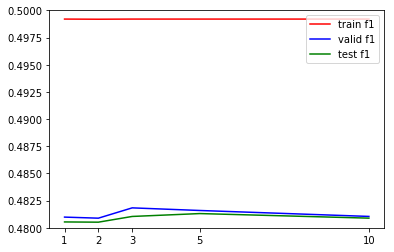

In [21]:
plt.plot(K, train_f1, color='r', label='train f1')
plt.plot(K, valid_f1, color='b', label='valid f1')
plt.plot(K, test_f1, color='g', label='test f1')
plt.legend(loc='upper right')
plt.ylim(0.48, 0.5)
plt.xticks([1, 2, 3, 5, 10])
plt.show()

### 根据上图呈现的趋势，我们选取领域大小k=3，weights=distance

### Step9: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [22]:
Three_neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
Three_neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [36]:
pred = Three_neigh.predict(X_test)

In [58]:
pla_candidate = []
for i, j, k in zip(X_test, y_test, pred):
    if k == 1 and j == 0:
        pla_candidate.append(i)

### 为了找回向量代表的段落，我的想法是根据tf-idf向量化后的关键词，回到content中进行匹配。因为这样的匹配时间会比较久，所以我只对一个例子进行操作。

In [90]:
target_text = ''
keyword = vectorize.inverse_transform(pla_candidate[0])[0]
for text in corpus:
    i = 0
    state = True
    while i < len(keyword) and state:
        word = keyword[i]
        if str(word) in str(text):
            pass
        else:
            state = False
        i += 1
    if i == len(keyword):
        target_text = text

### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

#### 答：数据思维是认为我们可以利用数据中潜在的关联性去对数据进行分析、推理。机器学习思维是建立模型，让模型通过接受大量的数据来自发的推演出数据中的信息、规律，然后对数据进行解释、预测

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。

### SVM

In [92]:
from sklearn.svm import SVC

In [97]:
KERNEL = ['rbf', 'linear', 'poly', 'sigmoid']
train_acc = []
train_precision = []
train_recall = []
train_f1 = []
valid_acc = []
valid_precision = []
valid_recall = []
valid_f1 = []
test_acc = []
test_precision = []
test_recall = []
test_f1 = []

for k in KERNEL:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    # acc
    t1 = clf.score(X_train, y_train)
    t2 = clf.score(X_valid, y_valid)
    t3 = clf.score(X_test, y_test)
    train_acc.append(t1)
    valid_acc.append(t2)
    test_acc.append(t3)
    # precision and recall
    p, r, t = precision_recall_curve(y_train, clf.predict(X_train))
    train_precision.append(p[1])
    train_recall.append(r[1])
    train_f1.append(p[1] * r[1] / (p[1] + r[1]))
    
    p, r, t = precision_recall_curve(y_valid, clf.predict(X_valid))
    valid_precision.append(p[1])
    valid_recall.append(r[1])
    valid_f1.append(p[1] * r[1] / (p[1] + r[1]))
    
    p, r, t = precision_recall_curve(y_test, clf.predict(X_test))
    test_precision.append(p[1])
    test_recall.append(r[1])
    test_f1.append(p[1] * r[1] / (p[1] + r[1]))
    
    print('SVM with kernel ', k,' accuracy on training, validation and test dataset is: ', round(t1, 2), round(t2, 2), round(t3, 2))
    

/Users/xuziqing/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM with kernel  rbf  accuracy on training, validation and test dataset is:  0.88 0.88 0.88
SVM with kernel  linear  accuracy on training, validation and test dataset is:  0.98 0.97 0.97
SVM with kernel  poly  accuracy on training, validation and test dataset is:  0.88 0.88 0.88
SVM with kernel  sigmoid  accuracy on training, validation and test dataset is:  0.88 0.88 0.88


### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
CRITERION = ['gini', 'entropy']
MAX_FEATURES = ['sqrt', 'log2']
N_ESTIMATOR = [10, 50, 100]
train_acc = []
train_precision = []
train_recall = []
train_f1 = []
valid_acc = []
valid_precision = []
valid_recall = []
valid_f1 = []
test_acc = []
test_precision = []
test_recall = []
test_f1 = []

for critera in CRITERION:
    for max_feature in MAX_FEATURES:
        for n_estimator in N_ESTIMATOR:
            clf = RandomForestClassifier(n_estimators=n_estimator, max_features=max_feature, criterion=critera)
            clf.fit(X_train, y_train)
            # acc
            t1 = clf.score(X_train, y_train)
            t2 = clf.score(X_valid, y_valid)
            t3 = clf.score(X_test, y_test)
            train_acc.append(t1)
            valid_acc.append(t2)
            test_acc.append(t3)
            # precision and recall
            p, r, t = precision_recall_curve(y_train, clf.predict(X_train))
            train_precision.append(p[1])
            train_recall.append(r[1])
            train_f1.append(p[1] * r[1] / (p[1] + r[1]))

            p, r, t = precision_recall_curve(y_valid, clf.predict(X_valid))
            valid_precision.append(p[1])
            valid_recall.append(r[1])
            valid_f1.append(p[1] * r[1] / (p[1] + r[1]))

            p, r, t = precision_recall_curve(y_test, clf.predict(X_test))
            test_precision.append(p[1])
            test_recall.append(r[1])
            test_f1.append(p[1] * r[1] / (p[1] + r[1]))

            print('RF with n_estimator: ', n_estimator, ',max_features: ', max_feature, ',criteria:', critera, ' ,accuracy on training, validation and test dataset is: ', round(t1, 2), round(t2, 2), round(t3, 2))


RF with n_estimator:  10 ,max_features:  sqrt ,criteria: gini  ,accuracy on training, validation and test dataset is:  1.0 0.98 0.99
RF with n_estimator:  50 ,max_features:  sqrt ,criteria: gini  ,accuracy on training, validation and test dataset is:  1.0 0.99 0.99
RF with n_estimator:  100 ,max_features:  sqrt ,criteria: gini  ,accuracy on training, validation and test dataset is:  1.0 0.99 0.99
RF with n_estimator:  10 ,max_features:  log2 ,criteria: gini  ,accuracy on training, validation and test dataset is:  1.0 0.98 0.98
RF with n_estimator:  50 ,max_features:  log2 ,criteria: gini  ,accuracy on training, validation and test dataset is:  1.0 0.99 0.99
RF with n_estimator:  100 ,max_features:  log2 ,criteria: gini  ,accuracy on training, validation and test dataset is:  1.0 0.99 0.99
RF with n_estimator:  10 ,max_features:  sqrt ,criteria: entropy  ,accuracy on training, validation and test dataset is:  1.0 0.99 0.99
RF with n_estimator:  50 ,max_features:  sqrt ,criteria: entropy

### LogisticRegression

In [102]:
from sklearn.linear_model import LogisticRegression

In [107]:
PENALTY = ['l2']
SOLVER = ['liblinear', 'lbfgs']
C = [0.1, 1, 10]
train_acc = []
train_precision = []
train_recall = []
train_f1 = []
valid_acc = []
valid_precision = []
valid_recall = []
valid_f1 = []
test_acc = []
test_precision = []
test_recall = []
test_f1 = []

for penalty in PENALTY:
    for solver in SOLVER:
        for c in C:
            clf = LogisticRegression(penalty=penalty, C=c, solver=solver)
            clf.fit(X_train, y_train)
            # acc
            t1 = clf.score(X_train, y_train)
            t2 = clf.score(X_valid, y_valid)
            t3 = clf.score(X_test, y_test)
            train_acc.append(t1)
            valid_acc.append(t2)
            test_acc.append(t3)
            # precision and recall
            p, r, t = precision_recall_curve(y_train, clf.predict(X_train))
            train_precision.append(p[1])
            train_recall.append(r[1])
            train_f1.append(p[1] * r[1] / (p[1] + r[1]))

            p, r, t = precision_recall_curve(y_valid, clf.predict(X_valid))
            valid_precision.append(p[1])
            valid_recall.append(r[1])
            valid_f1.append(p[1] * r[1] / (p[1] + r[1]))

            p, r, t = precision_recall_curve(y_test, clf.predict(X_test))
            test_precision.append(p[1])
            test_recall.append(r[1])
            test_f1.append(p[1] * r[1] / (p[1] + r[1]))

            print('LR with C:', c, ',penalty:', penalty, ',solver:', solver,' accuracy on training, validation and test dataset is: ', round(t1, 2), round(t2, 2), round(t3, 2))


LR with C: 0.1 ,penalty: l2 ,solver: liblinear  accuracy on training, validation and test dataset is:  0.95 0.96 0.95
LR with C: 1 ,penalty: l2 ,solver: liblinear  accuracy on training, validation and test dataset is:  0.97 0.97 0.97
LR with C: 10 ,penalty: l2 ,solver: liblinear  accuracy on training, validation and test dataset is:  0.98 0.98 0.98
LR with C: 0.1 ,penalty: l2 ,solver: lbfgs  accuracy on training, validation and test dataset is:  0.95 0.96 0.95
LR with C: 1 ,penalty: l2 ,solver: lbfgs  accuracy on training, validation and test dataset is:  0.97 0.97 0.97
LR with C: 10 ,penalty: l2 ,solver: lbfgs  accuracy on training, validation and test dataset is:  0.98 0.98 0.98


/Users/xuziqing/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [139]:
X_train_dense = [x.todense().tolist()[0] for x in X_train]
X_valid_dense = [x.todense().tolist()[0] for x in X_valid]
X_test_dense = [x.todense().tolist()[0] for x in X_test]

In [140]:
clf = GaussianNB()
clf.fit(X_train_dense, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [141]:
clf.score(X_valid_dense, y_valid)

0.78948404883812529

In [142]:
clf.score(X_test_dense, y_test)

0.79378068739770868

### Summarize

总的来说，random forest，logistic regression和naive bayes运行速度较快，knn，svm运行速度较慢。rf，logistic regression和svm准确率比较高，另外三个准确率比较差